In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import plotly.graph_objects as go
import numpy as np

#### Load data

In [2]:
file_path = "/Users/dariavasile/Documents/MSc/Thesis/CT Colonography June 22 2015.xlsx"  
df = pd.read_excel(file_path, engine="openpyxl")  
df.head()

,Patient ID,Patient Name,Patient Birth Date,Patient Sex,Ethnic Group,Phantom,Species Code,Species Description,Study Instance UID,Study Date,...,Manufacturer Model Name,Software Versions,Image Count,Max Submission Timestamp,License Name,License URI,Collection URI,File Size,Date Released,Third Party Analysis
0,1.3.6.1.4.1.9328.50.4.0001,1.3.6.1.4.1.9328.50.4.0001,NaN,F,NaN,NO,337915000,Homo sapiens,1.3.6.1.4.1.9328.50.4.1,2000-01-01 00:00:00.0,...,Sensation 64,syngo CT 2005A,2,2011-11-03 13:59:23.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.NWTESAY1,1052388,2013-11-15 00:00:00.0,NaN
1,1.3.6.1.4.1.9328.50.4.0001,1.3.6.1.4.1.9328.50.4.0001,NaN,F,NaN,NO,337915000,Homo sapiens,1.3.6.1.4.1.9328.50.4.1,2000-01-01 00:00:00.0,...,Sensation 64,syngo CT 2005A,1,2011-11-03 13:59:23.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.NWTESAY1,526150,2013-11-15 00:00:00.0,NaN
2,1.3.6.1.4.1.9328.50.4.0001,1.3.6.1.4.1.9328.50.4.0001,NaN,F,NaN,NO,337915000,Homo sapiens,1.3.6.1.4.1.9328.50.4.1,2000-01-01 00:00:00.0,...,Sensation 64,syngo CT 2005A,604,2011-11-03 14:02:12.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.NWTESAY1,317816814,2013-11-15 00:00:00.0,NaN
3,1.3.6.1.4.1.9328.50.4.0001,1.3.6.1.4.1.9328.50.4.0001,NaN,F,NaN,NO,337915000,Homo sapiens,1.3.6.1.4.1.9328.50.4.1,2000-01-01 00:00:00.0,...,Sensation 64,syngo CT 2005A,625,2011-11-03 14:04:51.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.NWTESAY1,328867958,2013-11-15 00:00:00.0,NaN
4,1.3.6.1.4.1.9328.50.4.0002,1.3.6.1.4.1.9328.50.4.0002,NaN,M,NaN,NO,337915000,Homo sapiens,1.3.6.1.4.1.9328.50.4.1240,2000-01-01 00:00:00.0,...,Sensation 64,syngo CT 2005A,637,2011-11-03 14:07:49.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.NWTESAY1,335183810,2013-11-15 00:00:00.0,NaN


In [3]:
print(len(df))

3451


In [4]:
file_path = "/Users/dariavasile/Documents/MSc/Thesis/WP-BIO/tcia-data/meta-data/meta_data_df.json"
df2 = pd.read_json(file_path, lines=True)

In [5]:
print(df2.columns)

Index(['InstanceUID', 'SubjectID', 'Date', 'Position', 'Sex', 'new_subject_id',
       'version', 'name', 'mha_path', 'dicom_path', 'on_erda', 'non_collapsed',
       'dimensions', 'iop_list', 'patient_position', 'pixel_spacing',
       'slice_thickness', 'image_position_patient'],
      dtype='object')


In [6]:
columns_to_drop = ['Date', 'name', 'mha_path', 'dicom_path', "on_erda"]
df2 = df2.drop(columns=columns_to_drop)


In [7]:
df = df.rename(columns={'Series Instance UID': 'InstanceUID'})

In [8]:
df_merged = df2.merge(df, on="InstanceUID", how="right") 
df_merged.head()

,InstanceUID,SubjectID,Date,Position,Sex,new_subject_id,version,name,mha_path,dicom_path,...,Manufacturer Model Name,Software Versions,Image Count,Max Submission Timestamp,License Name,License URI,Collection URI,File Size,Date Released,Third Party Analysis
0,1.3.6.1.4.1.9328.50.4.1222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sensation 64,syngo CT 2005A,2,2011-11-03 13:59:23.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.NWTESAY1,1052388,2013-11-15 00:00:00.0,NaN
1,1.3.6.1.4.1.9328.50.4.1224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sensation 64,syngo CT 2005A,1,2011-11-03 13:59:23.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.NWTESAY1,526150,2013-11-15 00:00:00.0,NaN
2,1.3.6.1.4.1.9328.50.4.2,1.3.6.1.4.1.9328.50.4.0001,2000-01-01,Prone,F,sub001,1.0,sub001_pos-prone_scan-1,converted/sub001/sub001_pos-prone_scan-1_conv-...,raw/sub001/sub001_pos-prone_scan-1.zip,...,Sensation 64,syngo CT 2005A,604,2011-11-03 14:02:12.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.NWTESAY1,317816814,2013-11-15 00:00:00.0,NaN
3,1.3.6.1.4.1.9328.50.4.563,1.3.6.1.4.1.9328.50.4.0001,2000-01-01,Supine,F,sub001,1.0,sub001_pos-supine_scan-1,converted/sub001/sub001_pos-supine_scan-1_conv...,raw/sub001/sub001_pos-supine_scan-1.zip,...,Sensation 64,syngo CT 2005A,625,2011-11-03 14:04:51.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.NWTESAY1,328867958,2013-11-15 00:00:00.0,NaN
4,1.3.6.1.4.1.9328.50.4.1241,1.3.6.1.4.1.9328.50.4.0002,2000-01-01,Prone,M,sub002,1.0,sub002_pos-prone_scan-1,converted/sub002/sub002_pos-prone_scan-1_conv-...,raw/sub002/sub002_pos-prone_scan-1.zip,...,Sensation 64,syngo CT 2005A,637,2011-11-03 14:07:49.0,Creative Commons Attribution 3.0 Unported License,http://creativecommons.org/licenses/by/3.0/,https://doi.org/10.7937/K9/TCIA.2015.NWTESAY1,335183810,2013-11-15 00:00:00.0,NaN


#### Patient Sex

In [9]:
df_grouped = df_merged.groupby('Patient ID').first().copy()
print(df_grouped['Sex'].unique())
print(df_grouped['Sex'].value_counts(dropna=False))

['F' 'M' 'O' 'U' 'Not available']
Sex
F                401
M                353
Not available     40
U                 19
O                 12
Name: count, dtype: int64


/var/folders/kc/61fkyq4177s09yz4qvdmrjs00000gn/T/ipykernel_58097/848720126.py:43: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


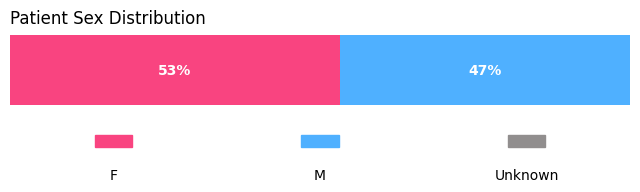

In [ ]:
# Data
order = ['F', 'M', 'Unknown']
counts = df_grouped['Patient Sex'].value_counts().reindex(order, fill_value=0)
total = counts.sum()
percentages = (counts / total).values
percent_texts = [f"{round(p * 100)}%" for p in percentages]

# Labels and colors
labels = ['F', 'M', 'Unknown']
colors = ["#f94480", "#4fb0ff", "#918e8e"]  

# Plot
fig, ax = plt.subplots(figsize=(8, 1))

# Stacked bar
left = 0
for i in range(len(percentages)):
    width = percentages[i]
    ax.barh(0, width, left=left, height=0.4, color=colors[i])
    
    # Add percentage text in the center of each bar segment
    if width > 0.05:  # Only label if big enough to fit text
        ax.text(left + width / 2, 0, percent_texts[i], ha='center', va='center', color='white', fontsize=10, fontweight='bold')
    else:
        # Optional: skip small segments or offset label
        pass

    left += width

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])

for i, (label, color) in enumerate(zip(labels, colors)):
    ax.text((i+0.5)/3, -0.6, label, color='black', ha='center', va='center')
    ax.add_patch(plt.Rectangle(((i+0.5)/3 - 0.03, -0.5), 0.06, 0.15, color=color, transform=ax.transAxes, clip_on=False))

# Remove borders
for spine in ax.spines.values():
    spine.set_visible(False)

plt.title("Patient Sex Distribution", loc='left')
plt.tight_layout()
plt.show()

#### Patient Position in Scan

In [11]:
df_merged['patient_position'].unique()
print(df_merged['patient_position'].value_counts(dropna=False))


patient_position
NaN     1706
FFP      589
FFS      589
HFS      266
HFP      261
HFDR      21
FFDR      11
FFDL       8
Name: count, dtype: int64


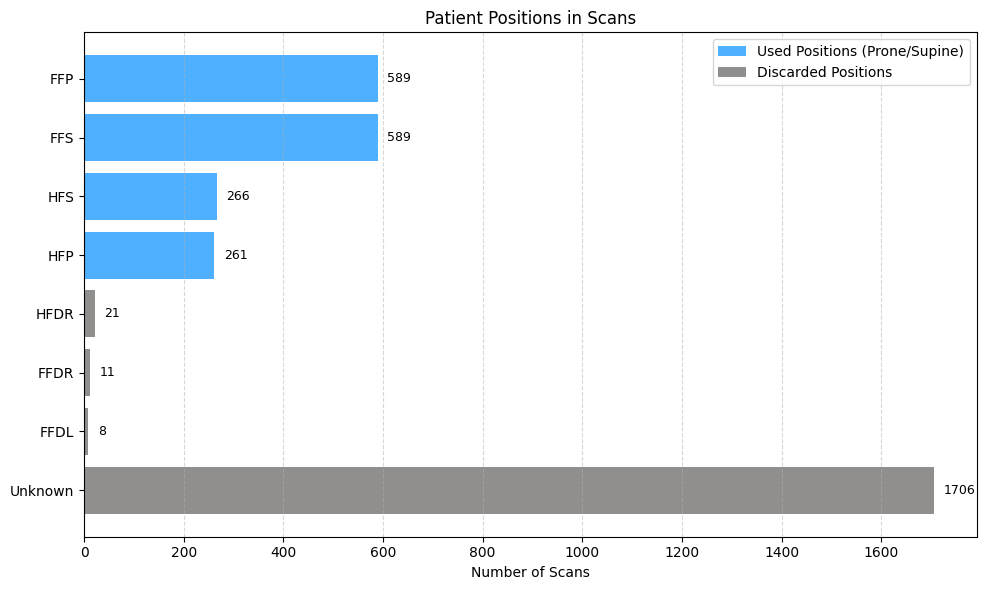

In [12]:
# Data
raw_counts = {'FFP': 589, 'FFS': 589, 'HFS': 266, 'HFP': 261, 'HFDR': 21, 'FFDR': 11, 'FFDL': 8, 'Unknown': 1706}
order = ['FFP', 'FFS', 'HFS', 'HFP', 'HFDR', 'FFDR', 'FFDL', 'Unknown']
used_positions = {'FFP', 'FFS', 'HFP', 'HFS'}  # prone & supine positions

counts = [raw_counts[pos] for pos in order]
colors = ['#4fb0ff' if pos in used_positions else '#918e8e' for pos in order]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(order, counts, color=colors)

for bar in bars:
    width = bar.get_width()
    ax.text(width + 20, bar.get_y() + bar.get_height()/2, str(width), va='center', fontsize=9)

ax.set_xlabel('Number of Scans')
ax.set_title('Patient Positions in Scans')
ax.invert_yaxis()  
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Legend
legend_elements = [
    Patch(facecolor="#4fb0ff", label='Used Positions (Prone/Supine)'),
    Patch(facecolor="#918e8e", label='Discarded Positions')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


#### Scanner Models

In [13]:
df_merged['Manufacturer Model Name'].unique()
print(df_merged['Manufacturer Model Name'].value_counts(dropna=False))

Manufacturer Model Name
Sensation 64         1210
LightSpeed16          865
Sensation 16          815
NaN                   202
Brilliance 40         117
Aquilion              110
LightSpeed VCT         91
Brilliance 64          27
LightSpeed Pro 16      14
Name: count, dtype: int64


In [14]:
print(df_merged['Manufacturer'].value_counts(dropna=False))

Manufacturer
SIEMENS               2025
GE MEDICAL SYSTEMS     970
NaN                    202
Philips                144
TOSHIBA                110
Name: count, dtype: int64


In [15]:
data = {
    'Manufacturer': ['SIEMENS', 'GE MEDICAL SYSTEMS', 'SIEMENS', 'Unknown', 'Philips', 'TOSHIBA',
                     'GE MEDICAL SYSTEMS', 'Philips', 'GE MEDICAL SYSTEMS'],
    'Model': ['Sensation 64', 'LightSpeed16', 'Sensation 16', 'Unknown', 'Brilliance 40', 'Aquilion',
              'LightSpeed VCT', 'Brilliance 64', 'LightSpeed Pro 16'],
    'Count': [1210, 865, 815, 202, 117, 110, 91, 27, 14]
}
df = pd.DataFrame(data)

all_labels = list(pd.unique(df['Manufacturer'].tolist() + df['Model'].tolist()))
label_index = {label: i for i, label in enumerate(all_labels)}

# Create source-target-value mappings
sources = df['Manufacturer'].map(label_index)
targets = df['Model'].map(label_index)
values = df['Count']

# Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
    )
)])

fig.update_layout(title_text="Sankey Diagram: Scanner Manufacturers → Models", font_size=12)
fig.show()


/var/folders/kc/61fkyq4177s09yz4qvdmrjs00000gn/T/ipykernel_58097/1072646651.py:10: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  all_labels = list(pd.unique(df['Manufacturer'].tolist() + df['Model'].tolist()))


#### Patient Age

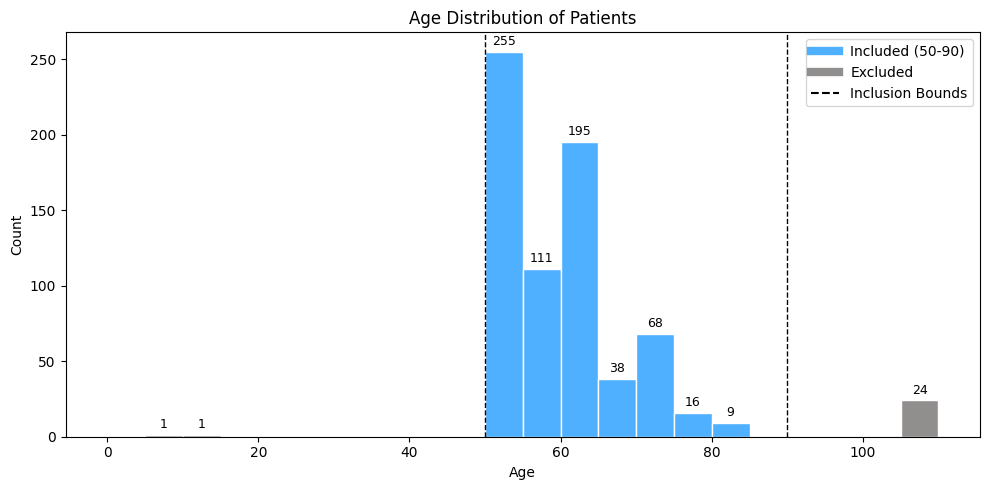

In [16]:
df_grouped['Patient Age'] = pd.to_numeric(df_grouped['Patient Age'].str.replace('Y', '', regex=False), errors='coerce')
ages = df_grouped['Patient Age'].dropna()

bin_edges = list(range(0, int(ages.max()) + 5, 5))
bin_centers = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges)-1)]

age_bins = pd.cut(ages, bins=bin_edges, right=False)
counts = age_bins.value_counts(sort=False)

colors = []
for center in bin_centers:
    if 50 <= center <= 90:
        colors.append('#4fb0ff')  
    else:
        colors.append('#918e8e')  

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(bin_centers, counts, width=5, color=colors, edgecolor='white', align='center')

ax.axvline(50, color='black', linestyle='--', linewidth=1)
ax.axvline(90, color='black', linestyle='--', linewidth=1)

for center, count in zip(bin_centers, counts):
    if count > 0:
        ax.text(center, count + max(counts)*0.01, str(count),
                ha='center', va='bottom', fontsize=9)

# Labels and legend
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Age Distribution of Patients')
ax.legend(handles=[
    plt.Line2D([0], [0], color='#4fb0ff', lw=6, label='Included (50-90)'),
    plt.Line2D([0], [0], color='#918e8e', lw=6, label='Excluded'),
    plt.Line2D([0], [0], color='black', linestyle='--', label='Inclusion Bounds')
])
plt.tight_layout()
plt.show()


#### Image Dimensions

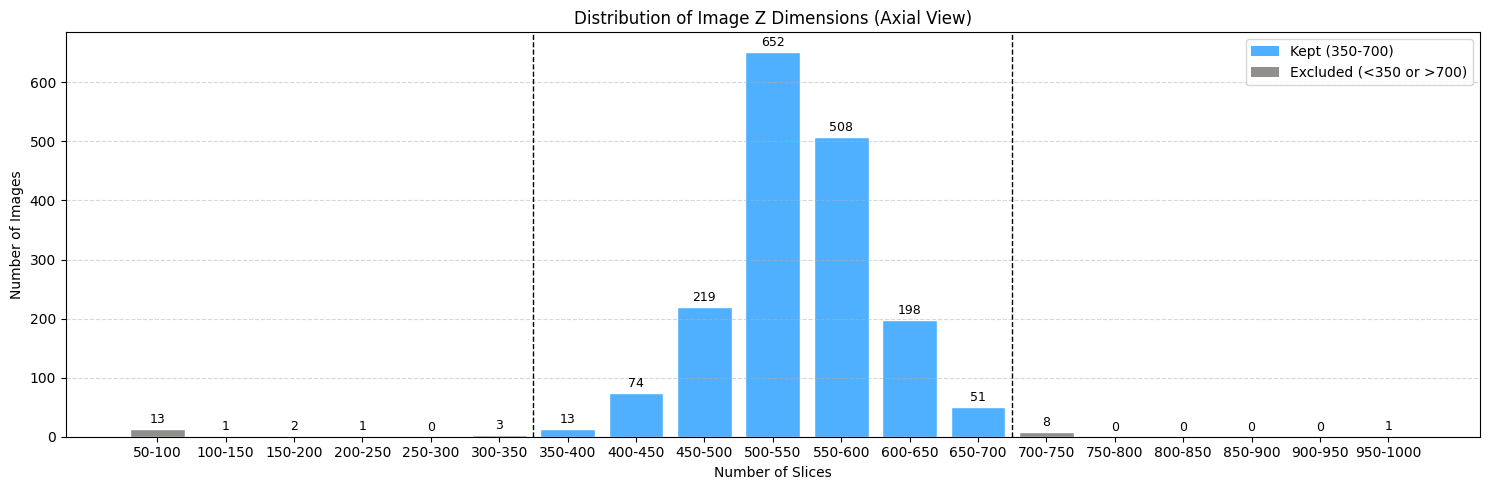

In [17]:
df_merged['dimensions'] = df_merged['dimensions'].apply(
    lambda x: x if isinstance(x, list) and len(x) == 3 else [None, None, None]
)
df_merged[['x', 'y', 'z']] = pd.DataFrame(df_merged['dimensions'].tolist(), index=df_merged.index)

z_values = pd.to_numeric(df_merged['z'], errors='coerce').dropna()

bins = list(range(50, 1001, 50))  # 0 to 1050
labels = [f'{bins[i]}-{bins[i+1]}' for i in range(len(bins)-1)]

z_categories = pd.cut(z_values, bins=bins, labels=labels, right=False)
bin_counts = z_categories.value_counts().reindex(labels, fill_value=0)

colors = []
for label in labels:
    lower, upper = map(int, label.split('-'))
    if lower >= 350 and upper <= 700:
        colors.append('#4fb0ff')  
    else:
        colors.append('#918e8e')  

# Plot
fig, ax = plt.subplots(figsize=(15, 5))
bars = ax.bar(labels, bin_counts.values, color=colors, edgecolor='white')

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5,
            str(height), ha='center', va='bottom', fontsize=9)
    
xticks = np.arange(len(labels))
bin_midpoints = [(a + b) / 2 for a, b in zip(bins[:-1], bins[1:])]

pos_350 = np.interp(350, bin_midpoints, xticks)
pos_700 = np.interp(700, bin_midpoints, xticks)

ax.axvline(x=pos_350, linestyle='--', color='black', linewidth=1)
ax.axvline(x=pos_700, linestyle='--', color='black', linewidth=1)
ax.set_ylabel('Number of Images')
ax.set_xlabel('Number of Slices')
ax.set_title('Distribution of Image Z Dimensions (Axial View)')
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Legend
legend_elements = [
    Patch(facecolor='#4fb0ff', label='Kept (350-700)'),
    Patch(facecolor='#918e8e', label='Excluded (<350 or >700)')
]
ax.legend(handles=legend_elements, loc='upper right')

plt.tight_layout()
plt.show()


In [18]:
df_merged['x'].unique()

array([ nan, 512.])

In [19]:
df_merged['y'].unique()

array([ nan, 512.])